In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
'''Combines the existing and future schedule data together, adds additional data for arrival/departure
stations, and calculates ischrone distance'''

'Combines the existing and future schedule data together, adds additional data for arrival/departure\nstations, and calculates ischrone distance'

In [4]:
df_future = pd.read_csv("../data/parsed_data/schedules/future_schedules_metrics.csv")

In [5]:
df_future.head()

,scenario,departure_station,arrival_station,departure_hour,count_journey_time,mean_journey_time,min_journey_time,max_journey_time,count_wait_time,mean_wait_time,min_wait_time,max_wait_time
0,Baseline NB,22nd STREET,SALESFORCE TRANSIT CENTER (STC) $,6,3,8.666667,8,9,60,10.5,0.0,25.0
1,Baseline NB,22nd STREET,SALESFORCE TRANSIT CENTER (STC) $,7,4,8.500000,8,9,60,9.7,0.0,23.0
2,Baseline NB,22nd STREET,SALESFORCE TRANSIT CENTER (STC) $,8,4,8.500000,8,9,60,9.7,0.0,23.0
3,Baseline NB,22nd STREET,SALESFORCE TRANSIT CENTER (STC) $,9,4,8.500000,8,9,60,9.7,0.0,23.0
4,Baseline NB,22nd STREET,SALESFORCE TRANSIT CENTER (STC) $,10,4,8.500000,8,9,60,9.7,0.0,23.0


In [6]:
df_existing = pd.read_csv("../data/parsed_data/schedules/existing_schedules_metrics.csv")

In [7]:
df_existing.head()

,scenario,departure_station,arrival_station,departure_hour,count_journey_time,mean_journey_time,min_journey_time,max_journey_time,count_wait_time,mean_wait_time,min_wait_time,max_wait_time
0,Existing,Bayshore,Belmont,5,2,32.0,31,33,60,22.833333,0.0,49.0
1,Existing,Bayshore,Belmont,6,1,34.0,34,34,60,29.500000,0.0,59.0
2,Existing,Bayshore,Belmont,7,1,34.0,34,34,60,29.500000,0.0,59.0
3,Existing,Bayshore,Belmont,8,1,34.0,34,34,60,21.333333,0.0,45.0
4,Existing,Bayshore,Belmont,9,1,33.0,33,33,60,28.683333,0.0,58.0


In [8]:
#Create 'nasty stations' dataframe
unique_stations = pd.DataFrame(np.append(df_future.departure_station.unique(),['SAN MARTIN','COLLEGE PARK']), columns=["nasty_station"])

In [9]:
#Add in 'pretty station' column
unique_stations["pretty_station"] = (unique_stations["nasty_station"].str.split("(").str[0]
    .str.strip()
    .str.replace('SALESFORCE TRANSIT CENTER', 'Transbay')
    .str.title()
    .str.replace('Townsend / 4Th And King \$', '4th and King')
    .str.replace('22Nd Street', '22nd St')
    .str.replace('San Jose', 'San Jose Diridon')
    .str.replace('California Avenue', 'California Ave'))

In [10]:
unique_stations.head()

,nasty_station,pretty_station
0,22nd STREET,22nd St
1,ATHERTON,Atherton
2,BAYSHORE,Bayshore
3,BELMONT,Belmont
4,BLOSSOM HILL (HSR) $,Blossom Hill


In [11]:
df_future.shape

(29297, 12)

In [12]:
#Merge in 'pretty' station names
df_future = df_future.merge(unique_stations.add_suffix('_departure'), left_on='departure_station', right_on='nasty_station_departure')

In [13]:
df_future = df_future.merge(unique_stations.add_suffix('_arrival'), left_on='arrival_station', right_on='nasty_station_arrival')

In [14]:
df_future.groupby(['scenario']).nunique()

,scenario,departure_station,arrival_station,departure_hour,count_journey_time,mean_journey_time,min_journey_time,max_journey_time,count_wait_time,mean_wait_time,min_wait_time,max_wait_time,nasty_station_departure,pretty_station_departure,nasty_station_arrival,pretty_station_arrival
scenario,,,,,,,,,,,,,,,,
Baseline NB,1,29,29,21,9,227,77,81,33,220,1,51,29,29,29,29
Baseline SB,1,29,29,20,9,170,76,79,39,182,1,53,29,29,29,29
HIgh NB,1,29,29,21,12,247,77,83,38,216,1,54,29,29,29,29
High SB,1,29,30,21,12,256,73,74,48,235,1,59,29,29,30,30
Moderate NB,1,29,29,21,10,240,79,83,38,176,1,47,29,29,29,29
Moderate SB,1,27,29,22,10,185,71,70,40,153,1,48,27,27,29,29


In [15]:
#Replace station names in future data with 'pretty' station names
df_future['departure_station'] = df_future['pretty_station_departure']
df_future['arrival_station'] = df_future['pretty_station_arrival']
df_future.drop(columns=['nasty_station_departure', 'pretty_station_departure', 'nasty_station_arrival', 'pretty_station_arrival'], inplace=True)

In [16]:
#Fix scenario names
df_future['scenario'] = df_future['scenario'].str.capitalize().str[:-3]

In [17]:
df_future.groupby(['scenario']).nunique()

,scenario,departure_station,arrival_station,departure_hour,count_journey_time,mean_journey_time,min_journey_time,max_journey_time,count_wait_time,mean_wait_time,min_wait_time,max_wait_time
scenario,,,,,,,,,,,,
Baseline,1,30,30,21,10,288,86,90,51,339,1,59
High,1,30,30,21,12,386,81,88,57,361,1,67
Moderate,1,30,30,22,10,314,80,84,54,268,1,59


In [18]:
df_future.head()

,scenario,departure_station,arrival_station,departure_hour,count_journey_time,mean_journey_time,min_journey_time,max_journey_time,count_wait_time,mean_wait_time,min_wait_time,max_wait_time
0,Baseline,22nd St,Transbay,6,3,8.666667,8,9,60,10.5,0.0,25.0
1,Baseline,22nd St,Transbay,7,4,8.500000,8,9,60,9.7,0.0,23.0
2,Baseline,22nd St,Transbay,8,4,8.500000,8,9,60,9.7,0.0,23.0
3,Baseline,22nd St,Transbay,9,4,8.500000,8,9,60,9.7,0.0,23.0
4,Baseline,22nd St,Transbay,10,4,8.500000,8,9,60,9.7,0.0,23.0


In [19]:
#Our existing and future data now looks the same! Concatenate the two.
df = pd.concat([df_future, df_existing], axis=0, ignore_index=True)

In [20]:
df.groupby(['scenario']).nunique()

,scenario,departure_station,arrival_station,departure_hour,count_journey_time,mean_journey_time,min_journey_time,max_journey_time,count_wait_time,mean_wait_time,min_wait_time,max_wait_time
scenario,,,,,,,,,,,,
Baseline,1,30,30,21,10,288,86,90,51,339,1,59
Existing,1,27,27,22,5,315,131,131,53,826,1,151
High,1,30,30,21,12,386,81,88,57,361,1,67
Moderate,1,30,30,22,10,314,80,84,54,268,1,59


In [21]:
#Read in station locations from file
df_locs = pd.read_csv("../data/station_locs.csv")

In [22]:
df_locs.head()

,Unnamed: 0,ZNAME,lat,lon
0,0,4th and King,37.776738,-122.394947
1,1,22nd St,37.757576,-122.392412
2,2,Bayshore,37.707716,-122.401817
3,3,South San Francisco,37.654343,-122.406324
4,4,San Bruno,37.630743,-122.411802


In [23]:
#Drop first column
df_locs = df_locs.drop(columns = ["Unnamed: 0"])

In [24]:
#Rename station name
df_locs = df_locs.rename(columns = {"ZNAME": "pretty_station"})

In [25]:
#Define station order
station_order = ['Transbay', '4th and King', '22nd St', 'Bayshore',
       'South San Francisco', 'San Bruno', 'Millbrae', 'Broadway',
       'Burlingame', 'San Mateo', 'Hayward Park', 'Hillsdale', 'Belmont',
       'San Carlos', 'Redwood City', 'Atherton', 'Menlo Park',
       'Palo Alto', 'California Ave', 'San Antonio', 'Mountain View',
       'Sunnyvale', 'Lawrence', 'Santa Clara', 'College Park',
       'San Jose Diridon', 'Tamien', 'Capitol', 'Blossom Hill',
       'Morgan Hill', 'San Martin', 'Gilroy']

In [26]:
#Set SB order
df_locs["SB_order"] = df_locs["pretty_station"].apply(lambda x: station_order.index(x))

In [27]:
#Set NB order
df_locs["NB_order"] = df_locs["pretty_station"].apply(lambda x: -(station_order.index(x)-31))

In [28]:
df_locs.head()

,pretty_station,lat,lon,SB_order,NB_order
0,4th and King,37.776738,-122.394947,1,30
1,22nd St,37.757576,-122.392412,2,29
2,Bayshore,37.707716,-122.401817,3,28
3,South San Francisco,37.654343,-122.406324,4,27
4,San Bruno,37.630743,-122.411802,5,26


In [29]:
#Merge in departure station info
df = df.merge(df_locs.add_suffix('_departure_station'), left_on='departure_station', right_on='pretty_station_departure_station')

In [30]:
#Merge in arrival station info
df = df.merge(df_locs.add_suffix('_arrival_station'), left_on='arrival_station', right_on='pretty_station_arrival_station')

In [31]:
#Drop dublicate station name columns
df.drop(columns=['pretty_station_departure_station', 'pretty_station_arrival_station'], inplace=True)

In [32]:
#Add in isochrone distance
#Walking speed is 84 meters per minute
df['isochrone_circle_distance'] = 84*(60 - df['mean_journey_time']).clip(lower=0)

In [33]:
df.head()

,scenario,departure_station,arrival_station,departure_hour,count_journey_time,mean_journey_time,min_journey_time,max_journey_time,count_wait_time,mean_wait_time,...,max_wait_time,lat_departure_station,lon_departure_station,SB_order_departure_station,NB_order_departure_station,lat_arrival_station,lon_arrival_station,SB_order_arrival_station,NB_order_arrival_station,isochrone_circle_distance
0,Baseline,22nd St,Transbay,6,3,8.666667,8,9,60,10.5,...,25.0,37.757576,-122.392412,2,29,37.789052,-122.397024,0,31,4312.0
1,Baseline,22nd St,Transbay,7,4,8.500000,8,9,60,9.7,...,23.0,37.757576,-122.392412,2,29,37.789052,-122.397024,0,31,4326.0
2,Baseline,22nd St,Transbay,8,4,8.500000,8,9,60,9.7,...,23.0,37.757576,-122.392412,2,29,37.789052,-122.397024,0,31,4326.0
3,Baseline,22nd St,Transbay,9,4,8.500000,8,9,60,9.7,...,23.0,37.757576,-122.392412,2,29,37.789052,-122.397024,0,31,4326.0
4,Baseline,22nd St,Transbay,10,4,8.500000,8,9,60,9.7,...,23.0,37.757576,-122.392412,2,29,37.789052,-122.397024,0,31,4326.0


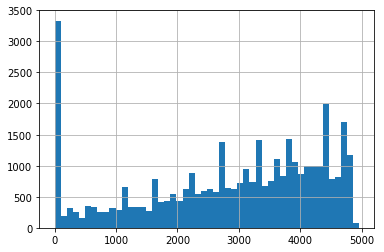

In [34]:
df['isochrone_circle_distance'].hist(bins=50)

In [35]:
df.shape

(37169, 21)

In [36]:
df.groupby(['scenario']).count()

,departure_station,arrival_station,departure_hour,count_journey_time,mean_journey_time,min_journey_time,max_journey_time,count_wait_time,mean_wait_time,min_wait_time,max_wait_time,lat_departure_station,lon_departure_station,SB_order_departure_station,NB_order_departure_station,lat_arrival_station,lon_arrival_station,SB_order_arrival_station,NB_order_arrival_station,isochrone_circle_distance
scenario,,,,,,,,,,,,,,,,,,,,
Baseline,10008,10008,10008,10008,10008,10008,10008,10008,10008,10008,10008,10008,10008,10008,10008,10008,10008,10008,10008,10008
Existing,7872,7872,7872,7872,7872,7872,7872,7872,7872,7872,7872,7872,7872,7872,7872,7872,7872,7872,7872,7872
High,9677,9677,9677,9677,9677,9677,9677,9677,9677,9677,9677,9677,9677,9677,9677,9677,9677,9677,9677,9677
Moderate,9612,9612,9612,9612,9612,9612,9612,9612,9612,9612,9612,9612,9612,9612,9612,9612,9612,9612,9612,9612


In [54]:
df[(df['departure_station'] == 'South San Francisco') &
  (df['arrival_station'] == 'Belmont') &
  (df['departure_hour'] == 11)]

,scenario,departure_station,arrival_station,departure_hour,count_journey_time,mean_journey_time,min_journey_time,max_journey_time,count_wait_time,mean_wait_time,...,max_wait_time,lat_departure_station,lon_departure_station,SB_order_departure_station,NB_order_departure_station,lat_arrival_station,lon_arrival_station,SB_order_arrival_station,NB_order_arrival_station,isochrone_circle_distance
4436,High,South San Francisco,Belmont,11,2,23.0,23,23,60,18.25,...,44.0,37.654343,-122.406324,4,27,37.521203,-122.276244,12,19,3108.0
4450,Moderate,South San Francisco,Belmont,11,1,21.0,21,21,60,29.50,...,59.0,37.654343,-122.406324,4,27,37.521203,-122.276244,12,19,3276.0
4469,Existing,South San Francisco,Belmont,11,1,27.0,27,27,60,29.50,...,59.0,37.654343,-122.406324,4,27,37.521203,-122.276244,12,19,2772.0


In [53]:
df[(df['scenario'] == 'Baseline') &
  (df['departure_station'] == 'South San Francisco')]['arrival_station'].unique()

array(['Transbay', '4th and King', 'Atherton', 'Burlingame', 'Hillsdale',
       'Lawrence', 'Millbrae', 'Mountain View', 'Palo Alto',
       'Redwood City', 'San Jose Diridon', 'San Mateo', 'Tamien',
       '22nd St'], dtype=object)

In [55]:
#Write to csv
df.to_csv('../data/parsed_data/schedules/combined_schedules_metrics.csv', index=False)